<a href="https://colab.research.google.com/github/Maneekul/Senior/blob/main/Tranformer_Trix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Some of the implementation of the full transformer architecture was adapted from the imperial NLP course
# https://github.com/ImperialNLP/NLPLabs-2022/tree/main/transformers_code_answers

In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
# Download and install TA-Lib library
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb'
!wget $url/libta-lib0_$ext -qO libta.deb
!wget $url/ta-lib0-dev_$ext -qO ta.deb
!dpkg -i libta.deb ta.deb
!apt-get install -y -f
!pip install ta-lib


Selecting previously unselected package libta-lib0.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

Reading packa

# try

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, defaultdict
import math
import yfinance as yf
import os
from sklearn.preprocessing import MinMaxScaler
from pytorch_lightning import seed_everything
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, defaultdict
import math
import yfinance as yf
import os
from pytorch_lightning import seed_everything
import random
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
#from pytorch_lightning.strategies import DDPStrategy

In [ ]:
np.random.seed(1233)
torch.manual_seed(1233)
np.random.seed(1233)
seed_everything(1233, workers=True)
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:2"

INFO:lightning_fabric.utilities.seed:Seed set to 1233


In [ ]:
# import torch

# if torch.cuda.is_available():
#     print(f"GPU Device Name: {torch.cuda.get_device_name(0)}")
# else:
#     print("No GPU available. Switch to GPU runtime.")


In [ ]:
device = ("cuda:0" if torch.cuda.is_available else "cpu")

In [ ]:
device = torch.device('cpu')

In [ ]:
import yfinance as yf
import talib
import pandas as pd
import numpy as np

tickers = ["WMB"]

start="2018-01-01"
end="2024-01-04"

data = yf.download(tickers, start=start, end=end)
trix_data = pd.DataFrame()
for i, ticker in enumerate(tickers):
    high = data['High']
    low = data['Low']
    close = data['Close']
    volume = data['Volume']

    trix = talib.TRIX(close, timeperiod=14)
    df_close_prices = pd.DataFrame(close)
    df_volume_prices = pd.DataFrame(close)
    trix_data[ticker + '_TRIX'] = trix

trix_data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
trix_data

,WMB_TRIX
Date,
2018-03-01,-0.498702
2018-03-02,-0.507841
2018-03-05,-0.516695
2018-03-06,-0.520841
2018-03-07,-0.521889
...,...
2023-12-27,-0.072219
2023-12-28,-0.074735
2023-12-29,-0.076947


In [ ]:
trix_data["2023-07-01":"2023-07-31"].shape

(20, 1)

#### Feature Indicators

In [ ]:
# Define the normalize_min_max function
def normalize_min_max(values):
    min_val = np.min(values)
    max_val = np.max(values)
    normalized_values = (values - min_val) / (max_val - min_val)
    return normalized_values

[*********************100%%**********************]  1 of 1 completed


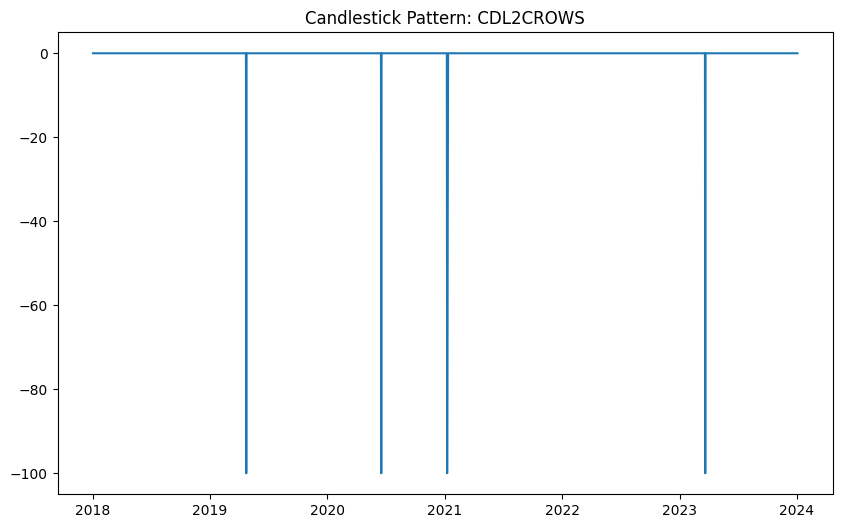

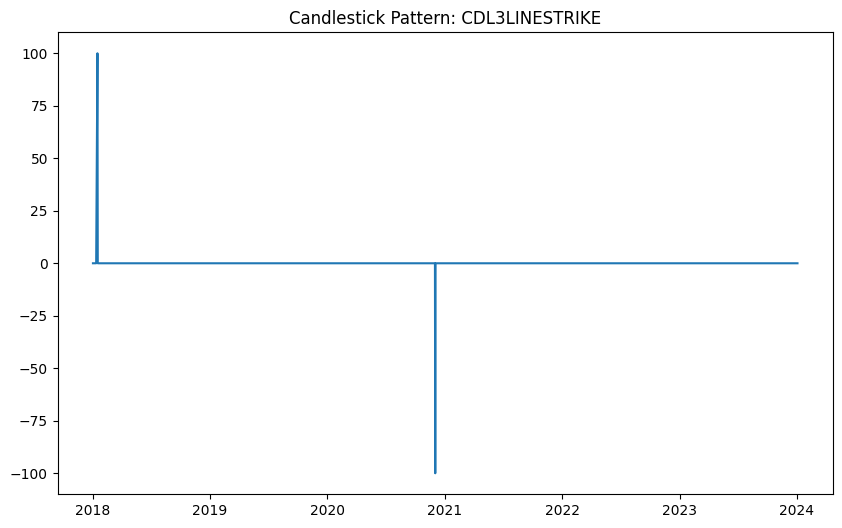

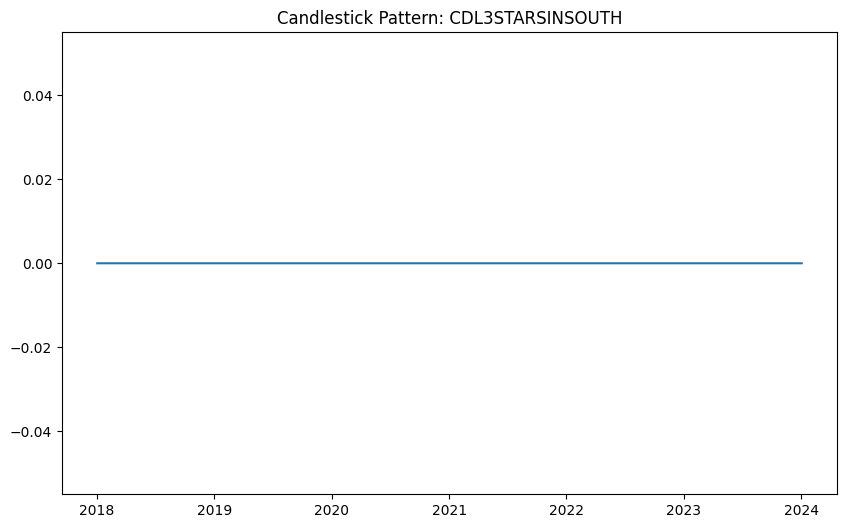

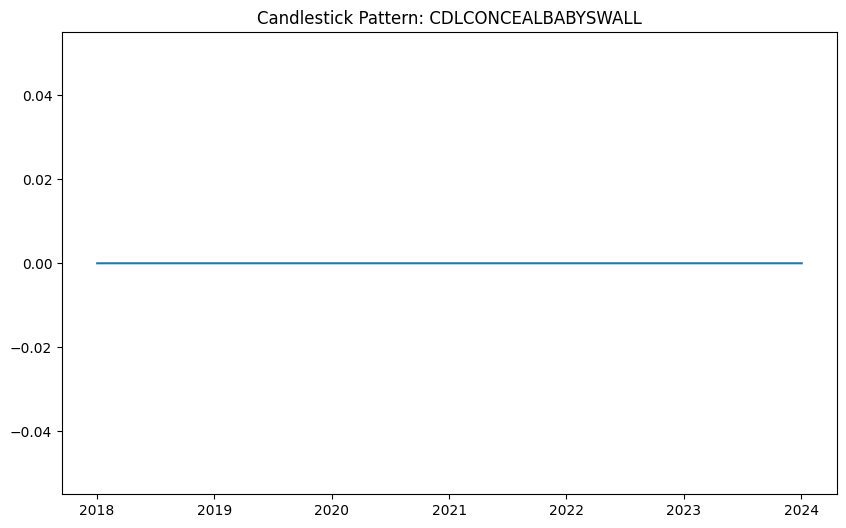

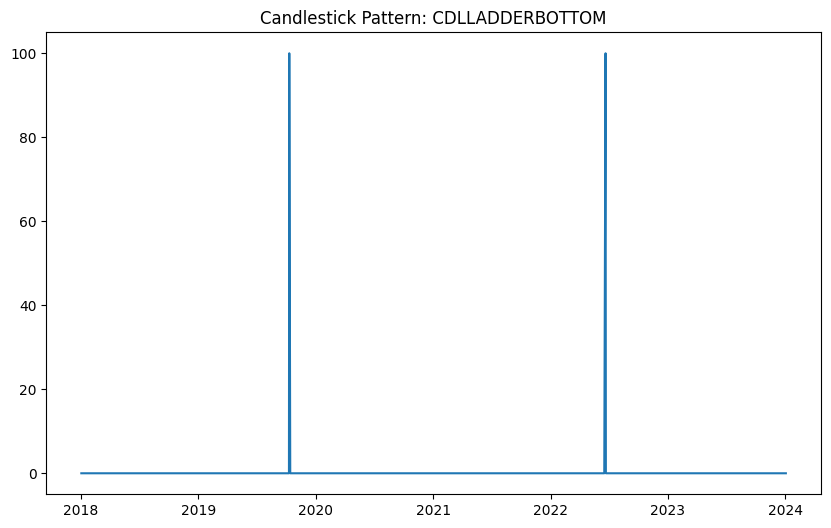

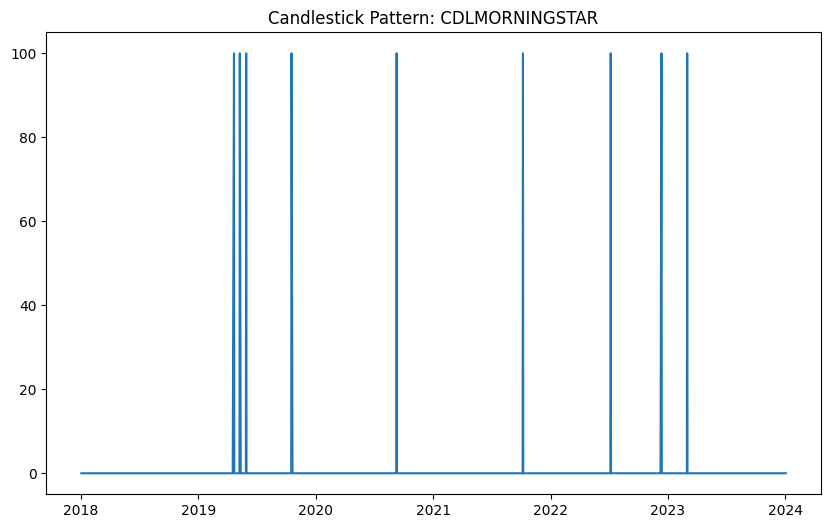

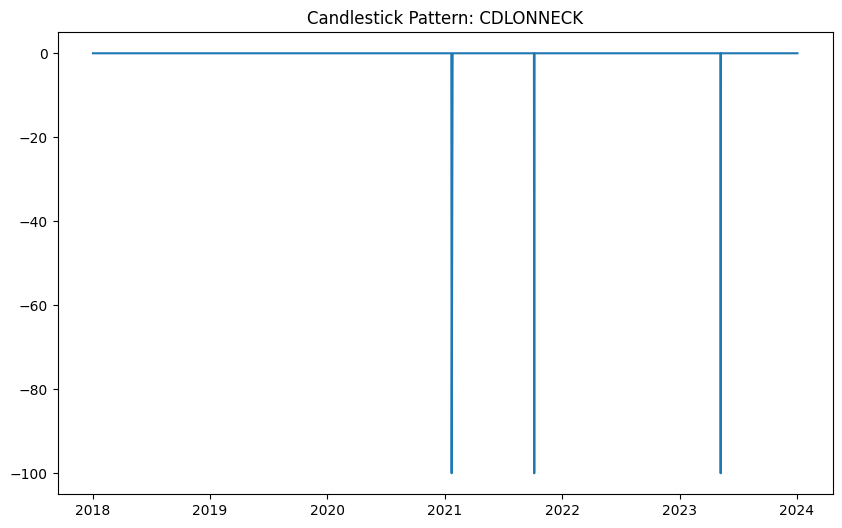

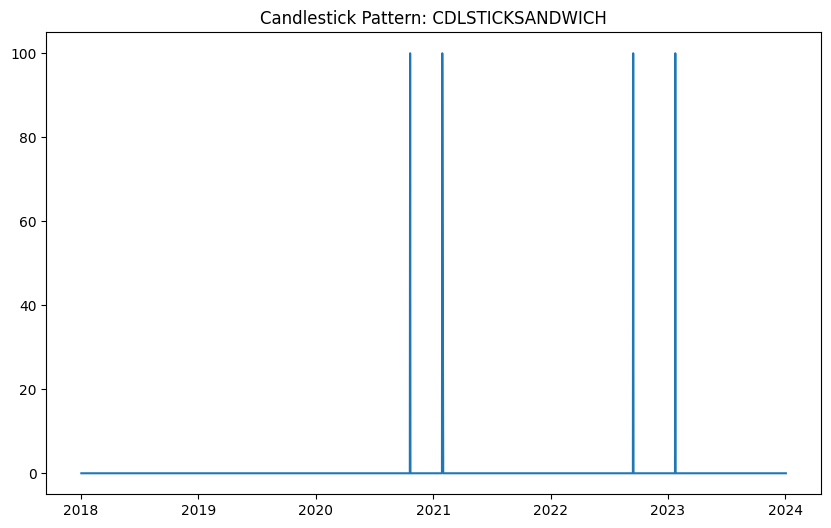

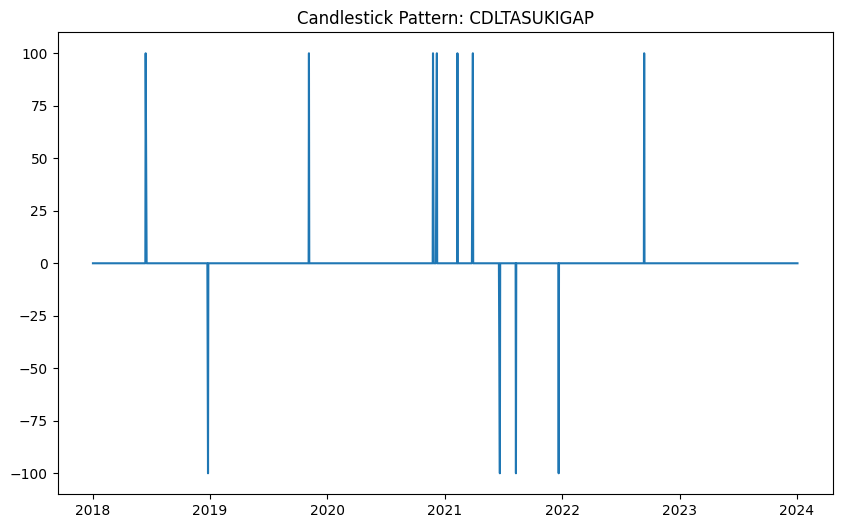

In [ ]:

My_ticker = ["WMB"]
# Define candlestick patterns
candlestick_patterns = [
    "CDL2CROWS", "CDL3LINESTRIKE", "CDL3STARSINSOUTH", "CDLCONCEALBABYSWALL",
    "CDLLADDERBOTTOM", "CDLMORNINGSTAR", "CDLONNECK",
    "CDLSTICKSANDWICH", "CDLTASUKIGAP"
]

pattern_data = {}

# Iterate over tickers
for ticker in My_ticker:
    data = yf.download(ticker,  start=start, end=end)

    # Identify candlestick patterns for each pattern in the list
    for pattern in candlestick_patterns:
        pattern_values = getattr(talib, pattern)(data['Open'], data['High'], data['Low'], data['Close'])
        pattern_data[f"{pattern}_{ticker}"] = pattern_values

# Plotting candlestick patterns
for pattern in candlestick_patterns:
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(f"Candlestick Pattern: {pattern}")

    # Plot each ticker's pattern data
    for ticker in My_ticker:
        pattern_values = pattern_data.get(f"{pattern}_{ticker}", None)
        if pattern_values is not None:
            ax.plot(data.index, pattern_values, label=ticker)

    # ax.legend()
    # plt.xlabel("Date")
    # plt.ylabel("Pattern Value")
    # plt.grid(True)
    # plt.show()


In [ ]:

My_ticker = ["WMB"]
#My_ticker = ["AAPL", "MSFT"]

candlestick_patterns = [
    "CDL2CROWS", "CDL3LINESTRIKE","CDL3STARSINSOUTH", "CDLCONCEALBABYSWALL",
    "CDLLADDERBOTTOM", "CDLMORNINGSTAR", "CDLONNECK",
    "CDLSTICKSANDWICH","CDLTASUKIGAP"]

combined_normalized_df = pd.DataFrame()
normalized_dfs = []
pattern_data = {}
stock_pattern_data = {}

for ticker in My_ticker:
    for pattern in candlestick_patterns:
        data = yf.download(ticker,  start=start, end=end)
        pattern_values = getattr(talib, pattern)(data['Open'], data['High'], data['Low'], data['Close'])
        normalized_pattern_values = pattern_values
        col_name = f"Normalized_{pattern}_{ticker}"
        # Store the normalized pattern values in the dictionary
        if col_name not in pattern_data:
            pattern_data[col_name] = normalized_pattern_values
        else:
            pattern_data[col_name] = pd.concat([pattern_data[col_name], normalized_pattern_values], axis=1)
        pattern_df = pd.DataFrame(pattern_data, index=data.index)
        pattern_df = pattern_df/100

    ## Calculate Aroon Oscillator
    aroon_oscillator = talib.AROONOSC(data['High'], data['Low'], timeperiod=14)
    my_trix = talib.TRIX(data['Close'], timeperiod=14)
    cci = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
    #adx = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
    macd,_,_ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    _, middle_band, _ = talib.BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2)


    trix_df = pd.DataFrame(my_trix, index=data.index, columns=[f"Trix_{ticker}"])
    aroon_oscillator_df = (pd.DataFrame(aroon_oscillator, index=data.index, columns=[f"AROONOSC_{ticker}"]))/100
    cci_df = pd.DataFrame(cci, index=data.index, columns=[f"CCI_{ticker}"])
    #adx_df = pd.DataFrame(adx, index=data.index, columns=[f"ADX_{ticker}"])
    macd_df = pd.DataFrame(macd, index=data.index, columns=[f"MACD_{ticker}"])

    # Scale the data to the range [-1, 1]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(cci_df)
    normalized_cci_values = pd.DataFrame(scaled_data, columns=cci_df.columns, index=cci_df.index)
    # normalized_cci_values= normalize_min_max(cci_df[f"CCI_{ticker}"])
    #normalized_adx_values = normalize_min_max(adx_df[f"ADX_{ticker}"])

    combined_normalized_df = pd.concat([combined_normalized_df,
                                        aroon_oscillator_df,
                                        pattern_df,
                                        trix_df,
                                        normalized_cci_values,
                                        #normalized_adx_values,
                                        macd_df,], axis=1)

combined_normalized_df.dropna(inplace=True)
combined_normalized_df = combined_normalized_df.loc[:, ~combined_normalized_df.columns.duplicated()]    # combined_normalized_df = combined__normalized_df_shift
combined_normalized_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
Date,,,,,,,,,,,,,
2018-03-01,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-02,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-05,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-06,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-07,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,-0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.072219,0.239712,-0.157822
2023-12-28,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074735,0.168495,-0.156669
2023-12-29,-0.214286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.076947,0.089904,-0.161958


In [ ]:
combined__normalized_df_shift = combined_normalized_df.shift(1)
combined__normalized_df_shift.dropna(inplace=True)
#combined__normalized_df_shift

In [ ]:
combined__normalized_df_shift

,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
Date,,,,,,,,,,,,,
2018-03-02,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-05,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-06,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-07,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-08,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.068665,0.241695,-0.167180
2023-12-28,-0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.072219,0.239712,-0.157822
2023-12-29,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074735,0.168495,-0.156669


#### model

In [ ]:
class AbsolutePositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.3, max_seq_len=200, device="cpu"):
        super().__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(dropout)

        pe = torch.zeros(max_seq_len, d_model).to(device)
        pos = torch.arange(0, max_seq_len).unsqueeze(1).float()

        two_i = torch.arange(0, d_model, step=2).float()
        div_term = torch.pow(10000, (two_i/torch.Tensor([d_model]))).float()
        pe[:, 0::2] = torch.sin(pos/div_term)
        pe[:, 1::2] = torch.cos(pos/div_term)

        pe = pe.unsqueeze(0)

        self.register_buffer("pe", pe)

    def forward(self, x):
        # shape(x) = [B x seq_len x D]
        pe = self.pe[:, :x.shape[1]].detach()
        x = x.add(pe)
        # shape(x) = [B x seq_len x D]
        return self.dropout(x)

In [ ]:
class Time2VecPositonalEncoding(nn.Module):
    def __init__(self,input_dim, output_dim, activation="sine"):
        super().__init__()
        self.linear_layer = nn.Linear(input_dim, 1)
        self.periodic_layer = nn.Linear(input_dim, output_dim - 1)
        self.activation = activation

    def forward(self, x):

        if self.activation == "sine":
            periodic_out = torch.sin(self.periodic_layer(x))
        elif self.activation == "cos":
            periodic_out = torch.cos(self.periodic_layer(x))


        original_out = self.linear_layer(x)

        out = torch.cat([periodic_out, original_out], 2)

        return out

In [ ]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, config):
        super().__init__()

        # print(config)
        dropout = config["dropout"]
        device = config["device"]
        max_seq_len = config["max_seq_len"]
        self.dropout = nn.Dropout(p=dropout)

        input_dim, d_model = config["input_dim"], config["d_model"]
        self.inputProjection = nn.Linear(input_dim, d_model)
        self.targetProjection = nn.Linear(input_dim, d_model)


        n_head, num_enc_layers, num_dec_layers = config["n_head"], config["num_enc_layers"], config["num_dec_layers"]
        self.transformer = nn.Transformer(d_model, n_head, num_enc_layers, num_dec_layers,
            dim_feedforward= 4 * d_model, dropout=dropout, batch_first=True, device=device)

        self.encoderLayer = nn.TransformerEncoderLayer(d_model, n_head, dim_feedforward=4 * d_model, dropout=dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(self.encoderLayer, num_enc_layers)

        steps_ahead = config["steps_ahead"]
        self.linear = nn.Linear(d_model, 1)
        self.decoder = nn.Linear(d_model * steps_ahead, steps_ahead)
        self.d_model = d_model
        self.use_encoder_only = config["use_encoder_only"]
        self.useInputProjection = config["use_input_projections"]

        self.isClassification = config["is_classification"]


        if config["use_absolute_enc"]:
            self.inputPosEncoding = AbsolutePositionalEncoding(d_model, dropout, max_seq_len, device)
            self.outputPosEncoding = AbsolutePositionalEncoding(d_model, dropout, max_seq_len, device)
        else:
            time2vecActivation = config["activation"]
            self.inputPosEncoding = Time2VecPositonalEncoding(input_dim, d_model, time2vecActivation)
            self.outputPosEncoding = Time2VecPositonalEncoding(input_dim, d_model, time2vecActivation)


        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def create_mask(self, size):
        return torch.triu(torch.ones(size, size) * float('-inf'), diagonal=1)

    def forward(self, src, trg):
        src_mask = self.create_mask(src.shape[1])
        src_mask = src_mask.type_as(src)
        trg_mask = self.create_mask(trg.shape[1])
        trg_mask = trg_mask.type_as(trg)
        if self.useInputProjection:
            src = self.inputProjection(src)
            trg = self.targetProjection(trg)

        if self.use_encoder_only:
            src = self.inputPosEncoding(src)
            out = self.encoder(src, src_mask)
            out = self.linear(out)
            if self.isClassification:
                out = F.log_softmax(out)
            return out
        else:
            src = self.inputPosEncoding(src)
            trg = self.outputPosEncoding(trg)

            out = self.transformer(src, trg, tgt_mask=trg_mask)
            out = self.linear(out)
            # out = self.decoder(out.flatten(start_dim=1))
            if self.isClassification:
                out = F.log_softmax(out)
            return out


In [ ]:
def r2_loss(output, target):
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

In [ ]:
def flatten(t):
    return [item for sublist in t for item in sublist]

def get_prediction(t):
    return [arr.view(-1) for arr in t]

In [ ]:
class TransformerTrainer(pl.LightningModule):
    def __init__(self, config):
        super().__init__()
        self.save_hyperparameters()

        config["device"] = self.hparams.config['device']
        self.model = TimeSeriesTransformer(config)

        self.d_model= config["d_model"]
        self.warmup_steps = config["warmup_steps"]
        self.lr = config["lr"]
        self.device_ = self.hparams.config['device']
        self.config = config
        self.training_len = config["training_len"]
        self.sampling = config["sampling"]
        self.forecast_window = config["steps_ahead"]
        self.k = config["k"]
        self.threshold = config["threshold"]
        self.validation_step_outputs = []

        if config["loss"] == 'mse':
            self.criterion = nn.MSELoss(reduction='sum')
        else:
            self.criterion = r2_loss


    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

    def change_lr_in_optimizer(self):
        min_arg1 = math.sqrt(self.global_step)
        min_arg2 = self.global_step * (self.warmup_steps**-1.5)
        lr = math.sqrt(self.d_model) * min(min_arg1, min_arg2)
        self.trainer.optimizers[0].param_groups[0]['lr'] = lr

    def prob_get_true_val(self, p):
        return random.random() < p

    def n_step_forward(self, src, trg):
        sampled_input = src
        all_preds = []

        # src.shape: [64, 60, 6]
        # tgt_in.shape: [64, 30, 6]
        # tgt_out: [64, 30]

        for i in range(self.forecast_window):
            pred = self.model(sampled_input, trg[:, i, :].unsqueeze(1))

            ## pred shape: [B * 1 * 1]
            if all_preds == []:
                all_preds = pred
            else:
                all_preds = torch.cat((all_preds, pred), dim=1)

            p = self.k / (self.k + math.exp(self.current_epoch/self.k))

            prob_true_val = True
            if self.sampling and i > self.threshold:
                prob_true_val = self.prob_get_true_val(p)

            if prob_true_val and i > self.threshold:
                sampled_input = torch.cat((sampled_input[:, 1:, :].detach(), trg[:, i, :].unsqueeze(1).detach()), dim=1)
            # else:
            #     sampled_input = torch.cat((sampled_input[:, 1:, :].detach(), pred.detach()), dim=1)

        return all_preds


    # def training_step(self, batch, batch_idx):
    #     src, trg_in, targets = batch

    #     y_hat = self.n_step_forward(src, trg_in)
    #     y_hat = y_hat.squeeze(-1)
    #     y = targets

    #     loss = self.criterion(y_hat, y)

    #     # Log individual loss for each step
    #     self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

    #     pearson_corr = self.calc_pearson_coeff(y_hat, y)
    #     self.log("train_pearson_coef", pearson_corr, on_step=True, on_epoch=True, prog_bar=True, logger=True)

    #     self.change_lr_in_optimizer()

    #     # Log average loss at each step

    #     avg_loss = torch.stack([x["loss"].detach() for x in outputs]).mean()


    #     print(avg_loss/len(y_hat))
    #     self.log("train_avg_loss", avg_loss, on_step=True, on_epoch=True, prog_bar=False, logger=True)

    #     return loss

    def training_step(self, batch, batch_idx):
        src, trg_in, targets = batch
        y_hat = self.n_step_forward(src, trg_in)
        y_hat = y_hat.squeeze(-1)
        y = targets
        loss = self.criterion(y_hat, y)

        print(f"Training Step - Epoch {self.current_epoch} - Loss: {loss.item()} - batch: {len(src)} {len(trg_in)} {len(targets)} ")
        for i in range((self.current_epoch)-1):
          pass

        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

        pearson_corr = self.calc_pearson_coeff(y_hat, y)
        self.log("train_pearson_coef", pearson_corr, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.change_lr_in_optimizer()
        return loss

    def on_training_epoch_end(self, outputs):
        print("---------------------------------------------------------1")
        avg_loss = torch.stack([x["loss"].detach() for x in outputs]).mean()
        print('avg_loss_train=',avg_loss)

        if self.current_epoch % 5 == 0:
            self.print_predictions(train_loader_unshuffled, train_output_img_dir+"train", "Training")

        self.log_dict({"train_loss_epoch": avg_loss, "step":self.current_epoch})

    def print_predictions(self, dataloader, file_prefix, title="Validation"):
        # print predictiion of first 1024 + 100 data points
        with torch.no_grad():
            all_predictions = []
            init_train_data = []
            all_targets = []
            for step, trng_data in enumerate(dataloader):
                if step == 1:
                    break

                src, _, targets = trng_data
                all_targets.append(targets[0].detach().cpu())

                if step == 0:
                    init_train_data = src[0, :, 0].reshape(-1)

                prediction = self(trng_data)
                all_predictions.append(prediction[0].detach().cpu())


            all_predictions = flatten(get_prediction(all_predictions))
            all_predictions = np.array(all_predictions)
            all_targets = flatten(get_prediction(all_targets))
            all_targets = np.array(all_targets)

            # print(all_predictions.shape)
            # print(all_targets.shape)
            # print(init_train_data.shape)

            # inverse transform
            init_train_data = train_targets_scaler.inverse_transform(init_train_data.reshape(-1, 1)).reshape(-1)
            all_predictions = train_targets_scaler.inverse_transform(all_predictions.reshape(-1, 1)).reshape(-1)
            all_targets = train_targets_scaler.inverse_transform(all_targets.reshape(-1, 1)).reshape(-1)

            end_plot_idx = self.training_len + len(all_predictions)
            plt.figure(figsize=(8, 6))
            plt.plot(init_train_data, label='trailing')
            plt.plot(np.arange(self.training_len, end_plot_idx), all_predictions, label="predicted")
            plt.plot(np.arange(self.training_len, end_plot_idx), all_targets, label="actual")
            plt.title(f"{title} prediction for epoch {self.current_epoch}")
            plt.legend()
            plt.grid()

            if not os.path.exists(file_prefix):
                os.makedirs(file_prefix)

            plt.savefig(f"{file_prefix}/Next_{len(all_predictions)}_preds_Epoch_{self.current_epoch}.jpg", bbox_inches="tight")

            plt.close()
            plt.show()


    def validation_step(self, batch, batch_idx):
        src, trg_in, targets = batch

        y_hat = self.n_step_forward(src, trg_in)
        y_hat = y_hat.squeeze(-1)
        y = targets

        loss = self.criterion(y_hat, y)

        self.log("valid_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

        pearson_corr = self.calc_pearson_coeff(y_hat, y)
        # print('pearson_corr_valid = ',pearson_corr)
        self.log("val_pearson_coef", pearson_corr ,on_step=True, on_epoch=True, prog_bar=True, logger=True)

        return loss

    # def on_validation_epoch_end(self, outputs):
    #     avg_loss = torch.stack(
    #         [x["loss"].detach() for x in outputs]).mean()

    #     # self.log("ptl/val_loss", avg_loss)

    #     if self.current_epoch % 5 == 0:
    #         self.print_predictions(val_loader, train_output_img_dir+"val", "validing")
    #     print('avg_loss_valid =',avg_loss)
    #     self.log_dict({"valid_loss_epoch": avg_loss, "step":self.current_epoch})

    def calc_pearson_coeff(self, y_pred, y):
        predicted = y_pred
        targets = y
        vy_pred = predicted - torch.mean(predicted)
        vy = targets - torch.mean(targets)
        denom = torch.sum(vy_pred ** 2) * torch.sum(vy ** 2)
        corr = torch.sum(vy_pred * vy) / torch.sqrt(denom)

        return corr

    def forward(self, x):
        src, trg_in, _ = x
        src = src.to(self._device)
        trg_in = trg_in.to(self._device)
        return self.n_step_forward(src, trg_in)


#### Create Sequence Dataset

In [ ]:
f_multiplier = 1_000_000
f_multiplier = 1
class FeaturesDataset(Dataset):
    def __init__(self, features, targets, training_len, forecast_len):
        super().__init__()
        self.features = features
        self.targets = targets
        self.training_len = training_len
        self.forecast_len = forecast_len
        self.feature_len = len(features)

    def __len__(self):
        return self.feature_len - self.training_len - self.forecast_len + 1

    def __getitem__(self, idx):

        end_trng_idx = idx + self.training_len
        end_target_idx = end_trng_idx + self.forecast_len

        train_features = torch.as_tensor(f_multiplier * self.features[idx:end_trng_idx], dtype=torch.float32)
        # first output to decoder is last input to encoder
        target_features = torch.as_tensor(f_multiplier * self.features[end_trng_idx - 1:end_target_idx - 1], dtype=torch.float32)
        target_values = torch.as_tensor(self.targets[end_trng_idx:end_target_idx], dtype=torch.float32)

        return FeaturesAndTarget(train_features, target_features, target_values)

#### Import yfinance

In [ ]:
def create_features(prices_data):

    features = pd.DataFrame(dict(px=prices_data)).assign(
        dpx1 = lambda x: x.px.ewm(span=8).mean() - x.px.ewm(span=32).mean(),
        dpx2 = lambda x: x.px.ewm(span=32).mean() - x.px.ewm(span=64).mean(),
        dpx3 = lambda x: x.px.ewm(64).mean() - x.px.ewm(128).mean(),
        dpx4 = lambda x: x.px.ewm(128).mean() - x.px.ewm(256).mean(),
        dpx5 = lambda x: x.px.ewm(12).mean() - x.px.ewm(26).mean(),
        # dpx1 = lambda x: x.px.ewm(20).mean(),
        # dpx2 = lambda x: x.px.ewm(50).mean(),
        # dpx3 = lambda x: x.px.ewm(100).mean(),
        # adj_close_diff_1 = lambda x: x.px.diff(),
        # adj_close_pct_diff = lambda x: x.px.pct_change(),
        # dpx1 = lambda x: np.diff(x.px, prepend=x.px[0]),
        # dpx2 = lambda x: np.diff(x.px, n=2, prepend=[x.px[0], x.px[0]]),
        # dpx4 = lambda x: x.px.ewm(256).mean() - x.px.ewm(512).mean(),
    )

    return features

In [ ]:
combined_14 = (pd.concat([df_close_prices, combined__normalized_df_shift], axis=1)).dropna()
combined_14

,Close,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
Date,,,,,,,,,,,,,,
2018-03-02,27.110001,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-05,27.240000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-06,27.629999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-07,27.459999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-08,27.150000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,35.029999,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.068665,0.241695,-0.167180
2023-12-28,34.930000,-0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.072219,0.239712,-0.157822
2023-12-29,34.830002,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074735,0.168495,-0.156669


In [ ]:
print(combined_14.columns)

Index(['Close', 'AROONOSC_WMB', 'Normalized_CDL2CROWS_WMB',
       'Normalized_CDL3LINESTRIKE_WMB', 'Normalized_CDL3STARSINSOUTH_WMB',
       'Normalized_CDLCONCEALBABYSWALL_WMB', 'Normalized_CDLLADDERBOTTOM_WMB',
       'Normalized_CDLMORNINGSTAR_WMB', 'Normalized_CDLONNECK_WMB',
       'Normalized_CDLSTICKSANDWICH_WMB', 'Normalized_CDLTASUKIGAP_WMB',
       'Trix_WMB', 'CCI_WMB', 'MACD_WMB'],
      dtype='object')


In [ ]:
# Dictionary mapping old column names to new column names
new_column_names = {
    'Close': 'px',
    'AROONOSC_WMB': 'dpx1',
    'Normalized_CDL2CROWS_WMB': 'dpx2',
    'Normalized_CDL3LINESTRIKE_WMB': 'dpx3',
    'Normalized_CDL3STARSINSOUTH_WMB': 'dpx4',
    'Normalized_CDLCONCEALBABYSWALL_WMB': 'dpx5',
    'Normalized_CDLLADDERBOTTOM_WMB': 'dpx6',
    'Normalized_CDLMORNINGSTAR_WMB': 'dpx7',
    'Normalized_CDLONNECK_WMB': 'dpx8',
    'Normalized_CDLSTICKSANDWICH_WMB': 'dpx9',
    'Normalized_CDLTASUKIGAP_WMB': 'dpx10',
    'Trix_WMB': 'dpx11',
    'CCI_WMB': 'dpx12',
    'MACD_WMB': 'dpx13'
}

# Renaming the columns
combined_14.rename(columns=new_column_names, inplace=True)



In [ ]:
combined_14

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
Date,,,,,,,,,,,,,,
2018-03-02,27.110001,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-05,27.240000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-06,27.629999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-07,27.459999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-08,27.150000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,35.029999,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.068665,0.241695,-0.167180
2023-12-28,34.930000,-0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.072219,0.239712,-0.157822
2023-12-29,34.830002,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074735,0.168495,-0.156669


#### Import Data

In [ ]:
FeaturesAndTarget = namedtuple('FeaturesAndTarget', ['train_features', 'target_features', 'target_values'])

#### Splitting Data


In [ ]:
def split_data(features):
    train_idx = int(features.shape[0]*0.6)
    val_idx = int(features.shape[0] * 0.2)
    train_features = features[:train_idx]
    val_features = features[train_idx:train_idx + val_idx]
    test_features = features[train_idx + val_idx:]

    return train_features, val_features, test_features

In [ ]:
combined_14

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
Date,,,,,,,,,,,,,,
2018-03-02,27.110001,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-05,27.240000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-06,27.629999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-07,27.459999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-08,27.150000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,35.029999,-0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.068665,0.241695,-0.167180
2023-12-28,34.930000,-0.357143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.072219,0.239712,-0.157822
2023-12-29,34.830002,-0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.074735,0.168495,-0.156669


In [ ]:
train_features, val_features, test_features = split_data(combined_14)
train_features.head()

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
Date,,,,,,,,,,,,,,
2018-03-02,27.110001,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-05,27.240000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-06,27.629999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-07,27.459999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-08,27.150000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757


#### Parameters

In [ ]:
device

device(type='cpu')

In [ ]:
params = dict(
    training_len=60,
    val_len=60,
    max_seq_len=1000,
    batch_size=64,
    d_model=128,
    lr = 1e-4,
    steps_ahead=1,
    input_dim=14,
    n_head=8,
    num_enc_layers=3,
    num_dec_layers=3,

    dropout=0.05,
    use_encoder_only=False,
    use_absolute_enc=True,
    use_input_projections=True,
    is_classification=False,
    device=device,
    warmup_steps=6000,
    loss='mse',
    scale=True,  # True
    activation="sine",
    k = 60,
    prices_only = False,
    sampling =False,
    threshold=-1
)

#### Preprocessing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_features_scaler = MinMaxScaler(feature_range=(-1, 1))
train_targets_scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
def preprocess_data_kk(train_features, val_features, test_features):

    train_ema = train_features.filter(like='dpx').values
    val_ema = val_features.filter(like='dpx').values
    test_ema = test_features.filter(like='dpx').values

    train_px = train_features['px'].values
    val_px = val_features['px'].values
    test_px = test_features['px'].values

    # Skip normalization for 'dpx' features
    f_train_ema = train_ema
    f_val_ema = val_ema
    f_test_ema = test_ema

    if params['scale']:
        # Only normalize 'px' feature
        train_targets_scaler.fit(train_px.reshape(-1, 1))

        f_train_px = train_targets_scaler.transform(train_px.reshape(-1, 1))
        f_val_px = train_targets_scaler.transform(val_px.reshape(-1, 1))
        f_test_px = train_targets_scaler.transform(test_px.reshape(-1, 1))

        f_train_values = np.concatenate([f_train_px, f_train_ema], axis=1)
        f_val_values = np.concatenate([f_val_px, f_val_ema], axis=1)
        f_test_values = np.concatenate([f_test_px, f_test_ema], axis=1)

    # price only data
    if params["prices_only"]:
        f_train_values = f_train_values[:, 0].reshape(-1, 1)
        f_val_values = f_val_values[:, 0].reshape(-1, 1)
        f_test_values = f_test_values[:, 0].reshape(-1, 1)

        f_train_targets = f_train_values.reshape(-1)
        f_val_targets = f_val_values.reshape(-1)
        f_test_targets = f_test_values.reshape(-1)

    else:
        # all values, incl price

        f_train_targets = f_train_values[:, 11].reshape(-1)
        f_val_targets = f_val_values[:, 11].reshape(-1)
        f_test_targets = f_test_values[:, 11].reshape(-1)


    return f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets

# def preprocess_data(train_features, val_features, test_features):

#     train_ema = train_features.filter(like='dpx').values
#     val_ema = val_features.filter(like='dpx').values
#     test_ema = test_features.filter(like='dpx').values

#     train_px = train_features['px'].values
#     val_px = val_features['px'].values
#     test_px = test_features['px'].values


#     if params['scale']:
#         train_features_scaler.fit(train_ema)
#         train_targets_scaler.fit(train_px.reshape(-1, 1))


#     if params['scale']:
#         f_train_ema = train_features_scaler.transform(train_ema)
#         f_val_ema = train_features_scaler.transform(val_ema)
#         f_test_ema = train_features_scaler.transform(test_ema)
#         f_train_px = train_targets_scaler.transform(train_px.reshape(-1, 1))
#         f_val_px = train_targets_scaler.transform(val_px.reshape(-1, 1))
#         f_test_px = train_targets_scaler.transform(test_px.reshape(-1, 1))

#         f_train_values = np.concatenate([f_train_px, f_train_ema], axis=1)
#         f_val_values = np.concatenate([f_val_px, f_val_ema], axis=1)
#         f_test_values = np.concatenate([f_test_px, f_test_ema], axis=1)

#     # price only data
#     if params["prices_only"]:
#         f_train_values = f_train_values[:, 0].reshape(-1, 1)
#         f_val_values = f_val_values[:, 0].reshape(-1, 1)
#         f_test_values = f_test_values[:, 0].reshape(-1, 1)

#         f_train_targets = f_train_values.reshape(-1)
#         f_val_targets = f_val_values.reshape(-1)
#         f_test_targets = f_test_values.reshape(-1)

#     else:
#         # all values, incl price

#         f_train_targets = f_train_values[:, 12].reshape(-1)
#         f_val_targets = f_val_values[:, 12].reshape(-1)
#         f_test_targets = f_test_values[:, 12].reshape(-1)

#     return f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets

In [ ]:
f_train_valuesk, f_val_valuesk, f_test_valuesk, f_train_targetsk, f_val_targetsk, f_test_targetsk = preprocess_data_kk(train_features, val_features, test_features)

In [ ]:
train_features

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
Date,,,,,,,,,,,,,,
2018-03-02,27.110001,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.498702,-0.460835,-1.036610
2018-03-05,27.240000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.507841,-0.478499,-1.084581
2018-03-06,27.629999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.516695,-0.304445,-1.099435
2018-03-07,27.459999,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.520841,-0.188778,-1.067433
2018-03-08,27.150000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.521889,-0.181763,-1.043757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,24.590000,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.217082,0.056904,-0.357886
2021-08-26,24.150000,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.212622,0.079204,-0.328055
2021-08-27,24.610001,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.209789,-0.098144,-0.336045


In [ ]:
train_features.shape , val_features.shape, test_features.shape

((882, 14), (294, 14), (294, 14))

In [ ]:
print(f'{f_train_targetsk.shape = }, {f_val_targetsk.shape = }, {f_test_targetsk.shape = },')
print(f'{train_features.shape = }, {val_features.shape = }, {test_features.shape = },')


f_train_targetsk.shape = (882,), f_val_targetsk.shape = (294,), f_test_targetsk.shape = (294,),
train_features.shape = (882, 14), val_features.shape = (294, 14), test_features.shape = (294, 14),


#### Defining datasets

In [ ]:
training_len = params['training_len']
forecast_len = params['steps_ahead']

print(training_len)
print(forecast_len)

60
1


In [ ]:
import random
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

gen = torch.Generator()
gen.manual_seed(1233)

In [ ]:
batch_size = 64

train_dataset = FeaturesDataset(f_train_valuesk, f_train_targetsk, params['training_len'], forecast_len)
val_dataset = FeaturesDataset(f_val_valuesk, f_val_targetsk, params['val_len'], forecast_len)
test_dataset = FeaturesDataset(f_test_valuesk, f_test_targetsk, params['val_len'], forecast_len)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, worker_init_fn=seed_worker, generator=gen)   #num_workers=2
val_loader = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=2)  #num_workers=2
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2)  #num_workers=2
train_loader_unshuffled = DataLoader(train_dataset, batch_size, shuffle=False, num_workers=2)  #num_workers=2

In [ ]:
src, trg_in, trg_out = next(iter(train_loader))
print(src.shape)
print(trg_in.shape)
print(trg_out.shape)

torch.Size([64, 60, 14])
torch.Size([64, 1, 14])
torch.Size([64, 1])


#### Define trainer

In [ ]:
log_dir = "transformer_n_step_ahead_logs"
model_dir = "transformer_n_step_ahead_models"

device = ("cuda:0" if torch.cuda.is_available else "cpu")



def train(ticker, version_name='', model_name ='', ckpt_dir='w2v'):

    if version_name == '':
        version_name = ticker

    if model_name == '':
        model_name = ticker

    logger = TensorBoardLogger(
        save_dir=log_dir,
        version=f'{version_name}_{ckpt_dir}'
    )

    checkpoint_callback = ModelCheckpoint(
        monitor="valid_loss_epoch",
        mode="min",
        dirpath=f"{model_dir}/{ckpt_dir}/{model_name}",
        filename="{epoch}-{valid_loss_epoch:.4f}",
        save_last= True,
        save_top_k=2
    )

    early_stopping_callback = EarlyStopping(
        monitor="valid_loss_epoch",
        mode="min",
        patience=100
    )

    metrics = {"loss": "ptl/val_loss"}

    trainer = pl.Trainer(
        max_epochs=30,  #200
        #gpus=1,
        logger=logger,
        callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=7,
       # strategy=DDPStrategy(find_unused_parameters=True),
    )

    stock_model = TransformerTrainer(params)

    trainer.fit(stock_model, train_loader, val_loader)

    return trainer, stock_model


In [ ]:
print(params)

{'training_len': 60, 'val_len': 60, 'max_seq_len': 1000, 'batch_size': 64, 'd_model': 128, 'lr': 0.0001, 'steps_ahead': 1, 'input_dim': 14, 'n_head': 8, 'num_enc_layers': 3, 'num_dec_layers': 3, 'dropout': 0.05, 'use_encoder_only': False, 'use_absolute_enc': True, 'use_input_projections': True, 'is_classification': False, 'device': device(type='cpu'), 'warmup_steps': 6000, 'loss': 'mse', 'scale': True, 'activation': 'sine', 'k': 60, 'prices_only': False, 'sampling': False, 'threshold': -1}


#### Evaluation metrics

In [ ]:
def get_nth_prediction(preds, n=0):
    return preds[n]

def concat_preds(preds):
    return np.concatenate(preds, axis=0)

def revert_transform(values):
    return train_targets_scaler.inverse_transform(values.reshape(-1, 1)).reshape(-1)

def get_prediction_value(preds):
    return [x.cpu().detach().numpy() for x in preds]

def forecast(stock_model, trainer, ckpt_path, test_loader):
    with torch.no_grad():
        predictions = trainer.predict(dataloaders=test_loader, model=stock_model, ckpt_path=ckpt_path)

    all_predictions = concat_preds(predictions)
    # predictions_flattened = np.array(flatten(get_nth_prediction(all_predictions, nth_pred)))

    return all_predictions   #predictions_flattened

def evaluate(pred, y):
    pred = revert_transform(pred)
    y = revert_transform(y)

    rmse = calculate_rmse(y, pred)
    mse = rmse ** 2
    mape = calculate_mape(y, pred)

    r = calc_pearson_coeff(pred, y)

    res = dict(
        rmse = rmse,
        mse =mse,
        mape =mape,
        r = r
    )

    return res


In [ ]:
def mse_loss(pred, target, reduction='sum'):
    loss = np.sum(np.square(pred - target))
    if reduction == "sum":
        return loss
    else:
        return loss / len(pred)

def calculate_rmse(y_true, y_pred):

    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

def calculate_mape(y_true, y_pred):

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100
    return mape


def calc_pearson_coeff(y_pred, y):

    predicted = y_pred
    targets = y
    vy_pred = predicted - np.mean(predicted)
    vy = targets - np.mean(targets)
    denom = np.sum(vy_pred ** 2) * np.sum(vy ** 2)

    corr = np.sum(vy_pred * vy) / np.sqrt(denom)

    return corr

In [ ]:
savefig = False
img_folder = "output_imgs/transformer_n_step/w2v/prices/"

def gen_fig(preds, eval_res, targets, img_folder, title, i = 0, savefig=False):
    if not os.path.exists(img_folder):
        os.makedirs(img_folder)

    plt.figure(figsize=(8, 6))

    start_idx = training_len + i
    end_idx = training_len + len(preds) + i

    filename = f"{img_folder}{ticker}_results.txt"
    if savefig:
        if os.path.exists(filename):
            f = open(filename, "a")
            f.write("\n")
        else:
            f = open(filename, "x")

    for metric in eval_res.keys():
        print(f"Metric {metric}: {eval_res[metric]}")
        if savefig:
            f.write(f"Metric {metric}: {eval_res[metric]}\n")

    plt.plot(list(range(start_idx, end_idx)), revert_transform(preds), label="predicted")
    plt.plot(list(range(start_idx, end_idx)), revert_transform(targets), label="target")
    plt.plot(revert_transform(f_test_targets[:training_len]), label="trailing")

    plt.title(f"{title}")
    plt.legend()
    plt.grid()

    if savefig:
        plt.savefig(f"{img_folder}{ticker}_all_preds.jpg", bbox_inches="tight")

    plt.show()


#### Running model on all stock data

In [ ]:
print(params)

{'training_len': 60, 'val_len': 60, 'max_seq_len': 1000, 'batch_size': 64, 'd_model': 128, 'lr': 0.0001, 'steps_ahead': 1, 'input_dim': 14, 'n_head': 8, 'num_enc_layers': 3, 'num_dec_layers': 3, 'dropout': 0.05, 'use_encoder_only': False, 'use_absolute_enc': True, 'use_input_projections': True, 'is_classification': False, 'device': device(type='cpu'), 'warmup_steps': 6000, 'loss': 'mse', 'scale': True, 'activation': 'sine', 'k': 60, 'prices_only': False, 'sampling': False, 'threshold': -1}


In [ ]:
shorter_tickers =["WMB"]  #  ["JNJ", "^GSPC"]
ckpt_dir='w2v_sampling'

for v in range(1):
    for ticker in shorter_tickers:
        # prices_data = yf.download(ticker, "2012-01-01", "2023-12-31")
        # prices_data = prices_data['Adj Close'].values

        # features = create_features(prices_data)

        train_features, val_features, test_features = split_data(combined_14)
        f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets = preprocess_data_kk(train_features, val_features, test_features)

        training_len = 60
        forecast_len = 1

        batch_size = 64

        gen = torch.Generator()
        gen.manual_seed(1233)

        train_dataset = FeaturesDataset(f_train_values, f_train_targets, params['training_len'], forecast_len)
        val_dataset = FeaturesDataset(f_val_values, f_val_targets, params['training_len'], forecast_len)
        test_dataset = FeaturesDataset(f_test_values, f_test_targets, params['training_len'], forecast_len)

        train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, worker_init_fn=seed_worker, generator=gen)
        val_loader = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=2)
        test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2)

        train_loader_unshuffled = DataLoader(train_dataset, batch_size, shuffle=False, num_workers=2)

        global train_output_img_dir

        img_dir = f"train_output_imgs/transformer_n_step/{ckpt_dir}/{ticker}/"
        train_output_img_dir = img_dir
        print(train_output_img_dir)

        trainer, stock_model = train(ticker, version_name=f"{ticker}_{v}", model_name=f"{ticker}_{v }", ckpt_dir=ckpt_dir)



train_output_imgs/transformer_n_step/w2v_sampling/WMB/


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                  | Params
----------------------------------------------------
0 | model     | TimeSeriesTransformer | 2.2 M 
1 | criterion | MSELoss               | 0     
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.745     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 0 - Loss: 38.43733215332031 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 35.783939361572266 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 33.12999725341797 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 42.85972595214844 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 24.858739852905273 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 18.393112182617188 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 56.0366096496582 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 14.268762588500977 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 44.160892486572266 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 17.877666473388672 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 20.037321090698242 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 23.94709587097168 - batch: 64 64 64 
Training Step - Epoch 0 - Loss: 7.822178840637207 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 1 - Loss: 20.264205932617188 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 22.53005599975586 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 8.841131210327148 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 20.593856811523438 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 18.916208267211914 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 6.289395809173584 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 13.637469291687012 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 14.381685256958008 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 10.811927795410156 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 12.765985488891602 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 6.976438522338867 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 6.2257232666015625 - batch: 64 64 64 
Training Step - Epoch 1 - Loss: 5.626633167266846 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 2 - Loss: 10.609476089477539 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 5.685887336730957 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 6.840436935424805 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 6.015016078948975 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 6.307098388671875 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 5.8161115646362305 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 5.638843536376953 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 6.383108139038086 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 7.049965858459473 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 6.264999866485596 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 11.40511703491211 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 5.8055500984191895 - batch: 64 64 64 
Training Step - Epoch 2 - Loss: 6.83036994934082 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 3 - Loss: 8.250000953674316 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 6.730872631072998 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 13.916991233825684 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 6.242254257202148 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 13.761903762817383 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 4.299849033355713 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 12.09940242767334 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 3.5704431533813477 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 9.776588439941406 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 4.472602367401123 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 7.359240531921387 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 5.513714790344238 - batch: 64 64 64 
Training Step - Epoch 3 - Loss: 2.3033947944641113 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 4 - Loss: 6.734340667724609 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 3.8543336391448975 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 3.5268125534057617 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 4.640648365020752 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 2.922046184539795 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 3.9000368118286133 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 1.798068642616272 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 3.580714464187622 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 2.1907622814178467 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 3.0202443599700928 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 1.8368281126022339 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 2.0050384998321533 - batch: 64 64 64 
Training Step - Epoch 4 - Loss: 2.0530269145965576 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 5 - Loss: 1.581505537033081 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 1.7596873044967651 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 2.3630530834198 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 2.079845666885376 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 2.6464223861694336 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 1.818118929862976 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 3.5728464126586914 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 2.091365337371826 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 6.319797992706299 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 1.3618799448013306 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 5.59898042678833 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 2.326411485671997 - batch: 64 64 64 
Training Step - Epoch 5 - Loss: 4.063951015472412 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 6 - Loss: 2.2054872512817383 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 3.3633077144622803 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 1.9185292720794678 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 5.105899810791016 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 1.0529613494873047 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 2.638658285140991 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 2.3319201469421387 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 2.349848747253418 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 3.334293842315674 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 1.7785954475402832 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 2.0772624015808105 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 1.1346817016601562 - batch: 64 64 64 
Training Step - Epoch 6 - Loss: 1.9746112823486328 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 7 - Loss: 1.4305031299591064 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 2.188457727432251 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 1.3131815195083618 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 1.1683872938156128 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 2.1573808193206787 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 0.873640239238739 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 1.3988205194473267 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 0.8349326848983765 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 1.5246150493621826 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 0.9265080690383911 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 0.6691341400146484 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 0.6025842428207397 - batch: 64 64 64 
Training Step - Epoch 7 - Loss: 0.9924043416976929 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 8 - Loss: 0.8025680780410767 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 0.7316032648086548 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 0.6555066704750061 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 0.6385522484779358 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 0.6773021221160889 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 1.0945487022399902 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 1.0950406789779663 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 1.1565449237823486 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 1.0354207754135132 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 1.3129862546920776 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 0.6585584282875061 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 1.0604126453399658 - batch: 64 64 64 
Training Step - Epoch 8 - Loss: 0.4575471878051758 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 9 - Loss: 1.0685703754425049 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.6237003207206726 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.9449583292007446 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.6400344371795654 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 1.9242985248565674 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.8543835878372192 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 1.4219509363174438 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 1.1961398124694824 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.6334244012832642 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.8824354410171509 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.47243160009384155 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.6580935716629028 - batch: 64 64 64 
Training Step - Epoch 9 - Loss: 0.5176699757575989 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 10 - Loss: 0.6117167472839355 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.5087233185768127 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.5604428648948669 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.7400158047676086 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 1.0376003980636597 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.4409824311733246 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.8515418171882629 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.5913220047950745 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 1.186368703842163 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 1.1929750442504883 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.4499381184577942 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 1.0536290407180786 - batch: 64 64 64 
Training Step - Epoch 10 - Loss: 0.4297776222229004 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 11 - Loss: 0.6122589707374573 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 1.0329307317733765 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.39142125844955444 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.7366369366645813 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 1.2720282077789307 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.5621609091758728 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.5016033053398132 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.4706817865371704 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.6278716325759888 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.5516423583030701 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.4835580885410309 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.5007378458976746 - batch: 64 64 64 
Training Step - Epoch 11 - Loss: 0.6565880179405212 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 12 - Loss: 1.28132164478302 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.6667415499687195 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.6840478777885437 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.3324566185474396 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 1.4744195938110352 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.829740047454834 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.29119884967803955 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.8602587580680847 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 1.3532425165176392 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.8236606121063232 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 2.77538800239563 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.8395990133285522 - batch: 64 64 64 
Training Step - Epoch 12 - Loss: 0.658271312713623 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 13 - Loss: 1.2877568006515503 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.895509660243988 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.647097110748291 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 1.0692601203918457 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 1.1525880098342896 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.9892234206199646 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.9507001042366028 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 1.1408098936080933 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 1.1056597232818604 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.7048028707504272 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 1.5226091146469116 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.5536794066429138 - batch: 64 64 64 
Training Step - Epoch 13 - Loss: 0.9418573379516602 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 14 - Loss: 0.4397888481616974 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 1.5446946620941162 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 1.220394492149353 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 1.7369345426559448 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 2.7465391159057617 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 0.4316025972366333 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 2.055858612060547 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 2.1367409229278564 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 0.6956755518913269 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 1.4398293495178223 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 0.3751738369464874 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 1.4684964418411255 - batch: 64 64 64 
Training Step - Epoch 14 - Loss: 1.2249946594238281 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 15 - Loss: 0.6017246842384338 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.7906525135040283 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.6537302732467651 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.7001274824142456 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.2324451357126236 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.5626531839370728 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.6798584461212158 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 1.0632410049438477 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.8911123275756836 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.42002537846565247 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.6111297607421875 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.39895394444465637 - batch: 64 64 64 
Training Step - Epoch 15 - Loss: 0.6399434804916382 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 16 - Loss: 0.3820277452468872 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.49182525277137756 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.2537386417388916 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.4533284306526184 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.3365879952907562 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.5590447187423706 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.387151300907135 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.7611411809921265 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.8856382966041565 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.2080676555633545 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.5350005626678467 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.34273818135261536 - batch: 64 64 64 
Training Step - Epoch 16 - Loss: 0.27558302879333496 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 17 - Loss: 0.24590370059013367 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.4679502248764038 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.39687681198120117 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.44692158699035645 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.2655133903026581 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.5156958103179932 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.390752375125885 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.3387666940689087 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.8722322583198547 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.35711973905563354 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.4919856786727905 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.31055206060409546 - batch: 64 64 64 
Training Step - Epoch 17 - Loss: 0.18342095613479614 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 18 - Loss: 0.30099204182624817 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.41730961203575134 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.3892367482185364 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 1.1568297147750854 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.3052107095718384 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.5428952574729919 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.7536493539810181 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.8287436962127686 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.568966269493103 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.4413912892341614 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.9730134010314941 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.2215850055217743 - batch: 64 64 64 
Training Step - Epoch 18 - Loss: 0.5246384143829346 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 19 - Loss: 0.2966805100440979 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 0.40003252029418945 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.6923744678497314 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.3319425582885742 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 0.630682647228241 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.8394925594329834 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.124277949333191 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 0.6446692943572998 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.5693540573120117 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 0.41346603631973267 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.4038209915161133 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 0.36617350578308105 - batch: 64 64 64 
Training Step - Epoch 19 - Loss: 1.3919812440872192 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 20 - Loss: 0.1945832520723343 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.8028429746627808 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.5242071747779846 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.36482763290405273 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.5602559447288513 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.5283453464508057 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.3299739956855774 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.6775798797607422 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.20245660841464996 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.3690628707408905 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.3854876458644867 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.9180980920791626 - batch: 64 64 64 
Training Step - Epoch 20 - Loss: 0.47222182154655457 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 21 - Loss: 0.6563888192176819 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.5908083915710449 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.6596918106079102 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.46494805812835693 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.6534140110015869 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.4368930459022522 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.7000795006752014 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.6586151719093323 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.3156515657901764 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.34502628445625305 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.3166810870170593 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.28409039974212646 - batch: 64 64 64 
Training Step - Epoch 21 - Loss: 0.4166218340396881 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 22 - Loss: 0.40645602345466614 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.3518570363521576 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.37227991223335266 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.2925359904766083 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.1795034259557724 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.6559031009674072 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.25555774569511414 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.41690772771835327 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.25121229887008667 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.2826618254184723 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.24272173643112183 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.16414141654968262 - batch: 64 64 64 
Training Step - Epoch 22 - Loss: 0.16584400832653046 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 23 - Loss: 0.2212403118610382 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 0.19010435044765472 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 2.366022825241089 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 1.4771244525909424 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 1.6997379064559937 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 0.3489130735397339 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 1.7602907419204712 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 2.658775806427002 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 2.0192065238952637 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 0.8741829991340637 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 0.37382665276527405 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 1.2946727275848389 - batch: 64 64 64 
Training Step - Epoch 23 - Loss: 3.0762906074523926 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 24 - Loss: 0.8226760029792786 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 2.091886520385742 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 2.06386399269104 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 1.1477479934692383 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 2.061788320541382 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 2.992623805999756 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 1.7502434253692627 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 1.127647042274475 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 3.956973075866699 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 0.5848941206932068 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 3.0899925231933594 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 1.0686652660369873 - batch: 64 64 64 
Training Step - Epoch 24 - Loss: 1.7507398128509521 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 25 - Loss: 0.5852360725402832 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 1.782567024230957 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 1.1246801614761353 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.9046744108200073 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.705312967300415 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.9152871966362 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.34321343898773193 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 1.554640531539917 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.8687148690223694 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.4265827238559723 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.29720139503479004 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.7195405960083008 - batch: 64 64 64 
Training Step - Epoch 25 - Loss: 0.6369616985321045 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 26 - Loss: 1.1058396100997925 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 0.29701462388038635 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 1.1040761470794678 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 0.3905547261238098 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 1.4854635000228882 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 0.6028382778167725 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 1.6765049695968628 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 0.8698961734771729 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 3.8457746505737305 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 1.6625237464904785 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 0.9572636485099792 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 1.8176445960998535 - batch: 64 64 64 
Training Step - Epoch 26 - Loss: 1.2092502117156982 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 27 - Loss: 1.9596117734909058 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 1.3308610916137695 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 1.6084239482879639 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.9200059771537781 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 1.5901551246643066 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.4634704887866974 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 1.287763237953186 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.7865304946899414 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.34309807419776917 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.3496261537075043 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.6743270754814148 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 1.0013234615325928 - batch: 64 64 64 
Training Step - Epoch 27 - Loss: 0.5130761861801147 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 28 - Loss: 1.069854736328125 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.86588454246521 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.24282577633857727 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 1.7278361320495605 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 1.6734651327133179 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.8264594078063965 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.661679208278656 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.36766210198402405 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.27970194816589355 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.3529028594493866 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.32285869121551514 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.4558582603931427 - batch: 64 64 64 
Training Step - Epoch 28 - Loss: 0.17378728091716766 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

Training Step - Epoch 29 - Loss: 0.2536284029483795 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.17682692408561707 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.6603348255157471 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.19399112462997437 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.22423717379570007 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.2742250859737396 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.37669897079467773 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.25569090247154236 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.4073108434677124 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.4555951654911041 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.25664907693862915 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.4208832085132599 - batch: 64 64 64 
Training Step - Epoch 29 - Loss: 0.34479111433029175 - batch: 54 54 54 


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


# Prediction

In [ ]:
ckpt_path='/content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt'
my_forecast_train = forecast(stock_model, trainer, ckpt_path, train_loader_unshuffled)
my_forecast_train.shape

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

(822, 1, 1)

In [ ]:
ckpt_path='/content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt'
my_forecast_val = forecast(stock_model, trainer, ckpt_path, val_loader)
my_forecast_val.shape

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

(234, 1, 1)

In [ ]:
ckpt_path='/content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt'
my_forecast = forecast(stock_model, trainer, ckpt_path, test_loader)
my_forecast.shape

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

(234, 1, 1)

In [ ]:
my_forecast_trainRe = my_forecast_train.reshape(-1)
my_forecast_valRe = my_forecast_val.reshape(-1)
my_forecast_Re = my_forecast.reshape(-1)


In [ ]:
targets_train = f_train_targets[training_len:]
targets_test = f_test_targets[training_len:]  #training_len = val_len
targets_valid = f_val_targets[training_len:]
targets_train.shape , targets_test.shape , targets_valid.shape

((822,), (234,), (234,))

In [ ]:
my_forecast_trainRe.shape , targets_train.shape

((822,), (822,))

In [ ]:
my_forecast_valRe.shape , targets_valid.shape


((234,), (234,))

In [ ]:
my_forecast_Re.shape , targets_test.shape

((234,), (234,))

In [ ]:
R2_train = calc_pearson_coeff(my_forecast_trainRe, targets_train)
R2_val = calc_pearson_coeff(my_forecast_valRe, targets_valid)
R2_test = calc_pearson_coeff(my_forecast_Re, targets_test)

print(f'{R2_train = } , {R2_val = }  , {R2_test = }')

R2_train = 0.9965005831919864 , R2_val = 0.9964536548403903  , R2_test = 0.9981630313921873


In [ ]:
from sklearn.metrics import r2_score

R2_train = r2_score(targets_train, my_forecast_trainRe)
R2_val = r2_score(targets_valid, my_forecast_valRe)
R2_test = r2_score(targets_test, my_forecast_Re)
print(f'{R2_train = } , {R2_val = }  , {R2_test = }')

R2_train = 0.9728246156371202 , R2_val = 0.933636344256307  , R2_test = 0.8879551300805749


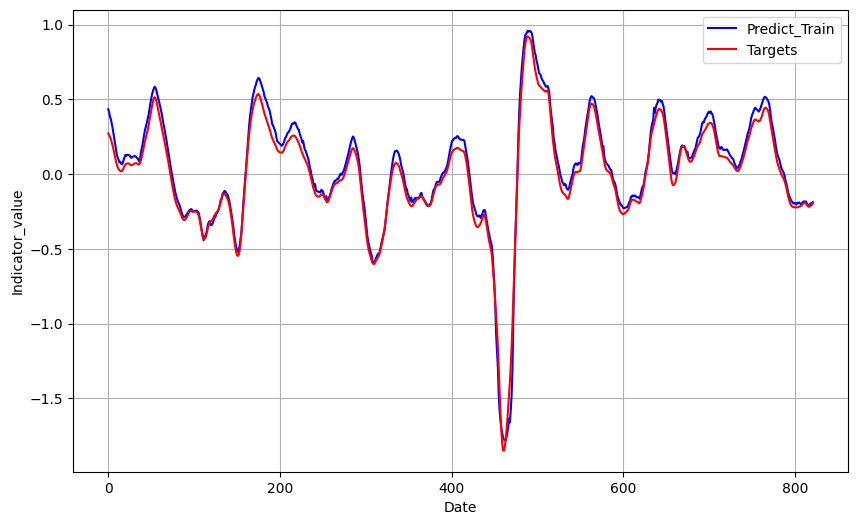

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(my_forecast_trainRe, label='Predict_Train', color='blue')
plt.plot(targets_train, label='Targets', color='red')

plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.legend()
plt.grid(True)
plt.show()

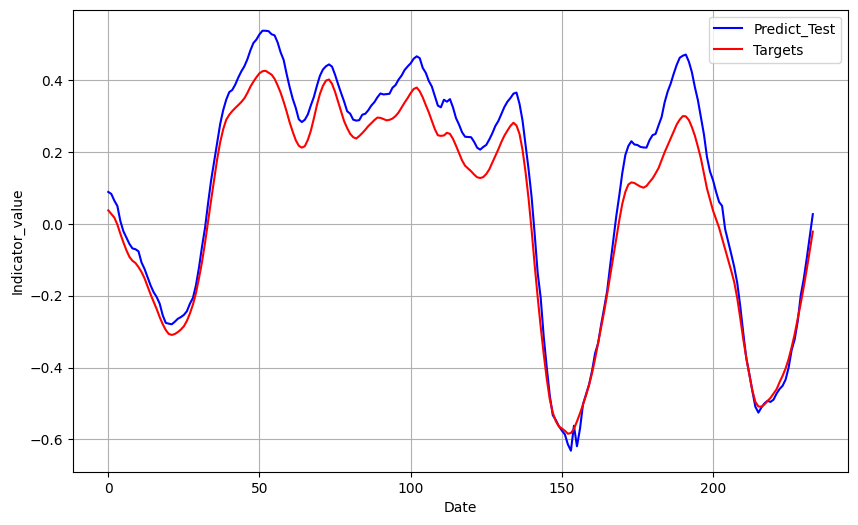

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(my_forecast_valRe, label='Predict_Test', color='blue')
plt.plot(targets_valid, label='Targets', color='red')

plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.legend()
plt.grid(True)
plt.show()

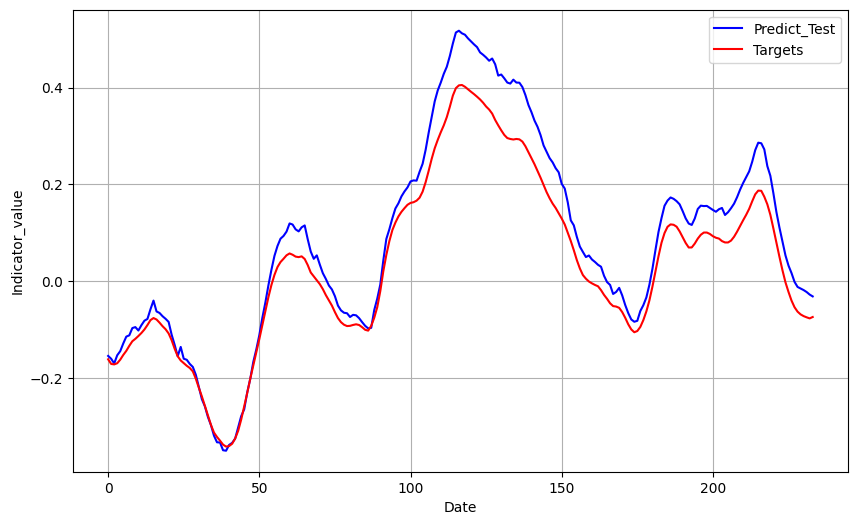

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(my_forecast_Re, label='Predict_Test', color='blue')
plt.plot(targets_test, label='Targets', color='red')

plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ckpt_path='/content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v4.ckpt'

# with torch.no_grad():
#       predictions = trainer.predict(dataloaders=train_loader, model=stock_model, ckpt_path=ckpt_path)

In [ ]:
# src, trg_in, trg_out = next(iter(val_loader))
# print(src.shape)
# print(trg_in.shape)
# print(trg_out.shape)

In [ ]:
targets_train = f_train_targets[training_len:training_len+forecast_len]
# targets_valid = f_valid_targets[training_len:training_len+forecast_len]


In [ ]:
import os
import torch

# Define the new directory and model name to save the model
new_dir = "/content/transformer_n_step_ahead_models/w2v_sampling_saved_models/"
model_name = "WMB_0_v6.pth"
model_path = os.path.join(new_dir, model_name)

# Create the directory if it doesn't exist
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

# Save the model
torch.save(stock_model.state_dict(), model_path)


In [ ]:
TRIX = test_features['dpx11'][training_len:]
TRIX

Date
2023-01-30   -0.161483
2023-01-31   -0.171091
2023-02-01   -0.172051
2023-02-02   -0.169667
2023-02-03   -0.162266
                ...   
2023-12-27   -0.068665
2023-12-28   -0.072219
2023-12-29   -0.074735
2024-01-02   -0.076947
2024-01-03   -0.074057
Name: dpx11, Length: 234, dtype: float64

In [ ]:
TRIX = val_features['dpx11'][training_len:]
Close = val_features['px'][training_len:]
TRIX_date = TRIX.index

series_dates = pd.Series(TRIX_date)
series_dates.index = TRIX.index

# Create a DataFrame
df_valid = pd.DataFrame({
    'Close': Close.values,
    'TRIX': TRIX.values,
    # 'Predicted_CCI':my_forecast_Re,
    # 'Train_CCI':my_forecast_Re,my_forecast_trainRe
    'Valid_TRIX':my_forecast_valRe,
}, index=series_dates)
df_valid


,Close,TRIX,Valid_TRIX
Date,,,
2021-11-26,28.240000,0.037762,0.089006
2021-11-29,28.010000,0.027462,0.083443
2021-11-30,26.790001,0.017602,0.064811
2021-12-01,26.639999,-0.001778,0.050025
2021-12-02,27.250000,-0.027671,0.007787
...,...,...,...
2022-10-25,31.850000,-0.221608,-0.199331
2022-10-26,32.150002,-0.175408,-0.153118
2022-10-27,32.500000,-0.126133,-0.095897


In [ ]:

TRIX = train_features['dpx11'][training_len:]
Close = train_features['px'][training_len:]
TRIX_date = TRIX.index

series_dates = pd.Series(TRIX_date)
series_dates.index = TRIX.index

# Create a DataFrame
df_train = pd.DataFrame({
    'Close': Close.values,
    'TRIX': TRIX.values,
    # 'Predicted_CCI':my_forecast_Re,
    'Train_TRIX':my_forecast_trainRe,
    # 'Valid_CCI':my_forecast_valRe,
}, index=series_dates)
df_train


,Close,TRIX,Train_TRIX
Date,,,
2018-05-29,26.660000,0.272636,0.433830
2018-05-30,27.190001,0.261904,0.413029
2018-05-31,26.860001,0.249971,0.384480
2018-06-01,26.680000,0.234282,0.368152
2018-06-04,26.540001,0.214769,0.340199
...,...,...,...
2021-08-25,24.590000,-0.217082,-0.207531
2021-08-26,24.150000,-0.212622,-0.197764
2021-08-27,24.610001,-0.209789,-0.193752


In [ ]:
TRIX = test_features['dpx11'][training_len:]
Close = test_features['px'][training_len:]
TRIX_date = TRIX.index

series_dates = pd.Series(TRIX_date)
series_dates.index = TRIX.index

# Create a DataFrame
df_test = pd.DataFrame({
    'Close': Close.values,
    'TRIX': TRIX.values,
    'Predicted_TRIX':my_forecast_Re,
    # 'Train_CCI':my_forecast_Re,my_forecast_trainRe
    # 'Valid_CCI':my_forecast_valRe,
}, index=series_dates)
df_test


,Close,TRIX,Predicted_TRIX
Date,,,
2023-01-30,31.030001,-0.161483,-0.154489
2023-01-31,32.240002,-0.171091,-0.160405
2023-02-01,31.860001,-0.172051,-0.170086
2023-02-02,32.209999,-0.169667,-0.153149
2023-02-03,32.080002,-0.162266,-0.144637
...,...,...,...
2023-12-27,35.029999,-0.068665,-0.015178
2023-12-28,34.930000,-0.072219,-0.018416
2023-12-29,34.830002,-0.074735,-0.022449


In [ ]:
def w_port_TRIX_Valid(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_TRIX = combined_df['TRIX'].values
    predict_values = combined_df['Valid_TRIX'].values
    # predict_values_T = combined_df['predict_values_T'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_TRIX[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_TRIX[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy
                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]
                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                num = count_day
            else:
                pass
        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()
    return my_wallet_values


In [ ]:
w_port_TRIX_Valid(df_valid)   #### TA

start_day =  2021-11-26T00:00:00.000000000
my_wallet = 903,870


[943343.986492157, 969755.6390781403, 903869.8343105316]

In [ ]:
w_port_TRIX_Valid(df_valid)   #### TA_predict_valid

start_day =  2021-11-26T00:00:00.000000000
my_wallet = 903,870


[943343.986492157, 969755.6390781403, 903869.8343105316]

In [ ]:
def w_port_TRIX_Train(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_TRIX = combined_df['TRIX'].values
    predict_values = combined_df['Train_TRIX'].values
    # predict_values_T = combined_df['predict_values_T'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_TRIX[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_TRIX[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy
                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]
                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                num = count_day
            else:
                pass
        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()
    return my_wallet_values


In [ ]:
w_port_TRIX_Train(df_train) #### TA

start_day =  2018-05-29T00:00:00.000000000
my_wallet = 1,078,579


[1071642.1842765808,
 1127353.2492790222,
 984400.9098701477,
 935400.1881065369,
 857586.4250144958,
 874242.9431686401,
 907009.4787216187,
 923508.4710922241,
 1078579.259355545]

In [ ]:
w_port_TRIX_Train(df_train)  #### TA_predict_train

start_day =  2018-05-29T00:00:00.000000000
my_wallet = 1,078,579


[1071642.1842765808,
 1127353.2492790222,
 984400.9098701477,
 935400.1881065369,
 857586.4250144958,
 874242.9431686401,
 907009.4787216187,
 923508.4710922241,
 1078579.259355545]

In [ ]:
def w_port_TRIX_Test(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_TRIX = combined_df['TRIX'].values
    predict_values = combined_df['Predicted_TRIX'].values
    # predict_values_T = combined_df['predict_values_T'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]
    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif my_TRIX[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if my_TRIX[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy
                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]
                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                num = count_day
            else:
                pass
        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()
    return my_wallet_values


In [ ]:
w_port_TRIX_Test(df_test) #### TA

start_day =  2023-01-30T00:00:00.000000000
my_wallet = 1,080,419


[969415.5174636841, 1098287.5066680908, 1080419.390258789]

In [ ]:
w_port_TRIX_Test(df_test) #### TA_predict_test

start_day =  2023-01-30T00:00:00.000000000
my_wallet = 1,080,419


[969415.5174636841, 1098287.5066680908, 1080419.390258789]

# Evaluate

In [ ]:
from scipy.signal import find_peaks
import pandas as pd
from typing import Tuple
def get_max_dip(wealth: pd.Series) -> float:
  loc_peak,_ = find_peaks(wealth) # find local peak
  loc_trough,_ = find_peaks(-wealth) # find local trough
  num_peaks = len(loc_peak)
  max_dip = 0
  for k, peak in enumerate(loc_peak, start=1):
    # for each peak we will find closest trough to the right
    if k < num_peaks:
      valid = (loc_trough > peak) & (loc_trough < loc_peak[k])
    else:
      valid = (loc_trough > peak)
    nearest_trough = np.where(valid)[0]
    if len(nearest_trough) > 0:
      peak_val = wealth.iloc[peak]
      trough_val = wealth.iloc[loc_trough[valid]].min()
      dip = (peak_val - trough_val)/ peak_val
      max_dip = max(max_dip, dip)
  return max_dip
def performanceEval(wealth: pd.Series) -> Tuple[float, float, float]:
  starting_wealth = wealth.iloc[0]
  ending_wealth = wealth.iloc[-1]
  profile_and_loss = (ending_wealth/ starting_wealth)  - 1
  num_years = len(wealth) / 250
  profile_and_loss = profile_and_loss / num_years
  avg_ret = wealth.pct_change(1).dropna().mean()
  std_ret = wealth.pct_change(1).dropna().std()
  sharpe_ratio = np.sqrt(250) * (avg_ret/ std_ret)
  max_dip = get_max_dip(wealth)
  return profile_and_loss, sharpe_ratio, max_dip



In [ ]:
### predict_macd ###
val_train = w_port_TRIX_Train(df_train)
my_Series_t = pd.Series(val_train)
eval = performanceEval(my_Series_t)
print(eval)

start_day =  2018-05-29T00:00:00.000000000
my_wallet = 1,078,579
(0.17981424471574803, 0.7626705196568045, 0.2392921867542855)


In [ ]:
def buy_and_hold(df_train):
    # Buy and hold strategy
    initial_cash = 1_000_000  # initial cash in portfolio
    shares = initial_cash / df_train['Close'].iloc[0]  # number of shares bought
    portfolio_value = shares * df_train['Close']  # portfolio value over time
    return portfolio_value


In [ ]:
portfolio_value = buy_and_hold(df_train)
portfolio_value[-1]

926106.5519643759

In [ ]:
portfolio_value = buy_and_hold(df_valid)
portfolio_value[-1]

1158994.3274613696

In [ ]:
portfolio_value = buy_and_hold(df_test)
portfolio_value[-1]

1170157.9300614672

In [ ]:
portfolio = pd.Series(portfolio_value)
eval = performanceEval(portfolio)
print(eval)

(-0.022473676409861358, 0.14743377889251094, 0.4149272767556157)


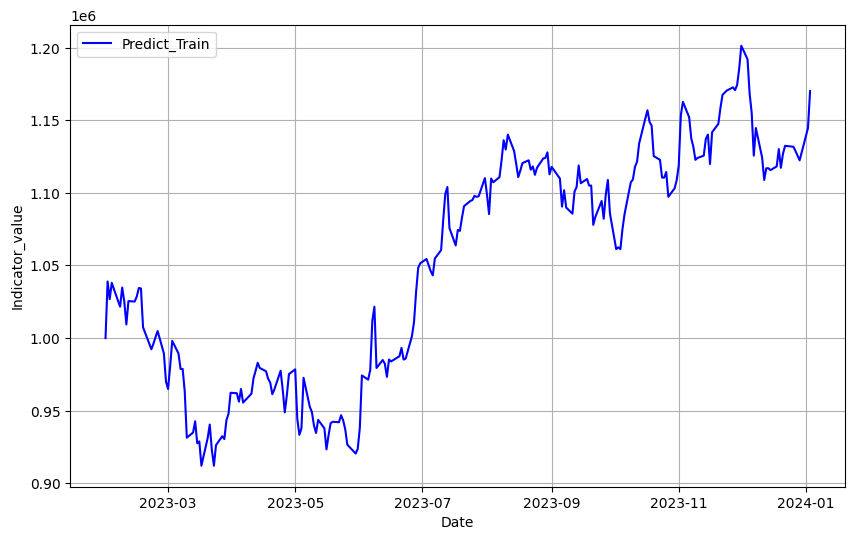

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label='Predict_Train', color='blue')
# plt.plot(portfolio_value.index,targets_train, label='Targets', color='red')
# plt.plot(portfolio_value.index,portfolio_value.values, label='Targets', color='green')


plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.legend()
plt.grid(True)
plt.show()